In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [65]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [5]:
data = pd.read_excel('FinalCleanCrimeData.xlsx', sheet_name='Final clean')

In [7]:
data.head(3)

,IDCrime,barangay,street,date_committed,time_committed,offense,crime_category,month,year,day_of_week,hour,address,Lat,Long,pop_den,population,area
0,1,Obrero,SCOUT OJEDA ST.,2016-01-01,04:00:00,THEFT,PROPERTY,1,2016,4,4,"SCOUT OJEDA ST. Obrero, Quezon City, Philippines",14.628555,121.027308,0.031648,8269,261279
1,2,Roxas,HYACINTH ST.,2016-01-01,15:30:00,THEFT,PROPERTY,1,2016,4,15,"HYACINTH ST. Roxas, Quezon City, Philippines",14.628370,121.023324,0.033303,16060,482245
2,3,Sacred Heart,SCOUT TORILLO ST.,2016-01-02,00:00:00,ROBBERY,PROPERTY,1,2016,5,0,"SCOUT TORILLO ST. Sacred Heart, Quezon City, P...",14.632830,121.037120,0.014459,8282,572785


In [11]:
crimes = data.drop(columns = ['address'])

In [14]:
crimes.date_committed = pd.to_datetime(crimes.date_committed, format='%m/%d/%Y %I:%M:%S %p')

In [16]:
crimes.index = pd.DatetimeIndex(crimes.date_committed)

In [17]:
crimes.shape

(1658, 16)

In [105]:
popden = pd.pivot_table(crimes,aggfunc=np.size, columns='pop_den')
popden
#popden.plot.scatter(x = 'IDCrime', y = 'pop_den', alpha=0.5)
#plt.show() # Depending on whether you use IPython or interactive mode, etc.

pop_den,0.00919456224642,0.0103642854401,0.0122775899463,0.0132802442485,0.0144591775273,0.0164149207275,0.0200030023268,0.0316481615438,0.0329831640755,0.0333025744176,0.0421906518564
IDCrime,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0
Lat,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0
Long,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0
area,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0
barangay,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0
crime_category,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0
date_committed,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0
day_of_week,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0
hour,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0
is_weekend,51.0,82.0,316.0,393.0,125.0,131.0,71.0,45.0,125.0,55.0,264.0


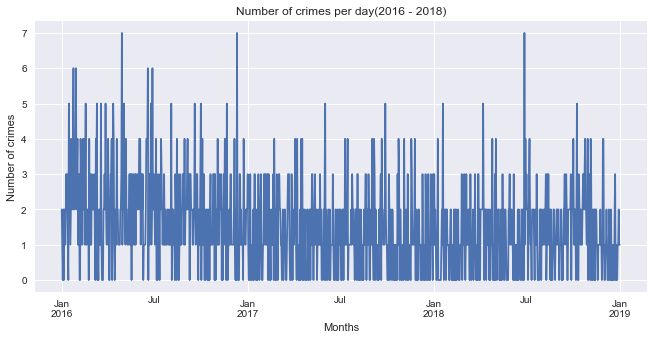

In [42]:
plt.figure(figsize=(11,5))
crimes.resample('D').size().plot(legend=False)
plt.title('Number of crimes per day(2016 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

a pattern can be seen in the crime incidents by day throughout 2016-2018

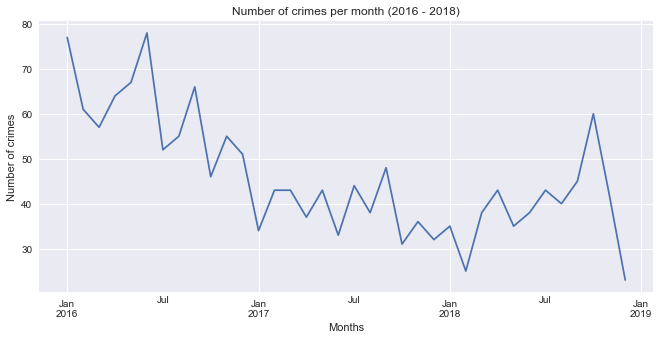

In [19]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2016 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

from 2016, crime by month decreases until the first month of 2018 and proceed to increase again

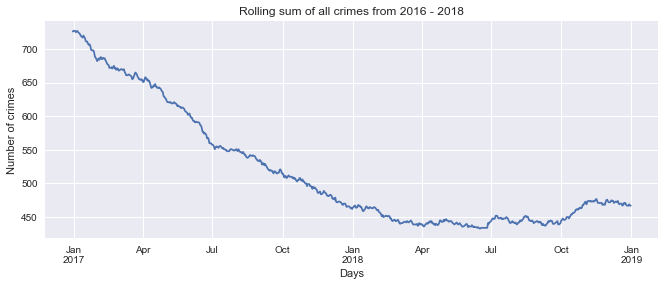

In [52]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2016 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

In [ ]:
crimes_count_day = crimes.pivot_table('IDCrime', aggfunc=np.size, columns='offense', index=crimes.index.date, fill_value=0)
crimes_count_day.index = pd.DatetimeIndex(crimes_count_day.index)
plo = crimes_count_day.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

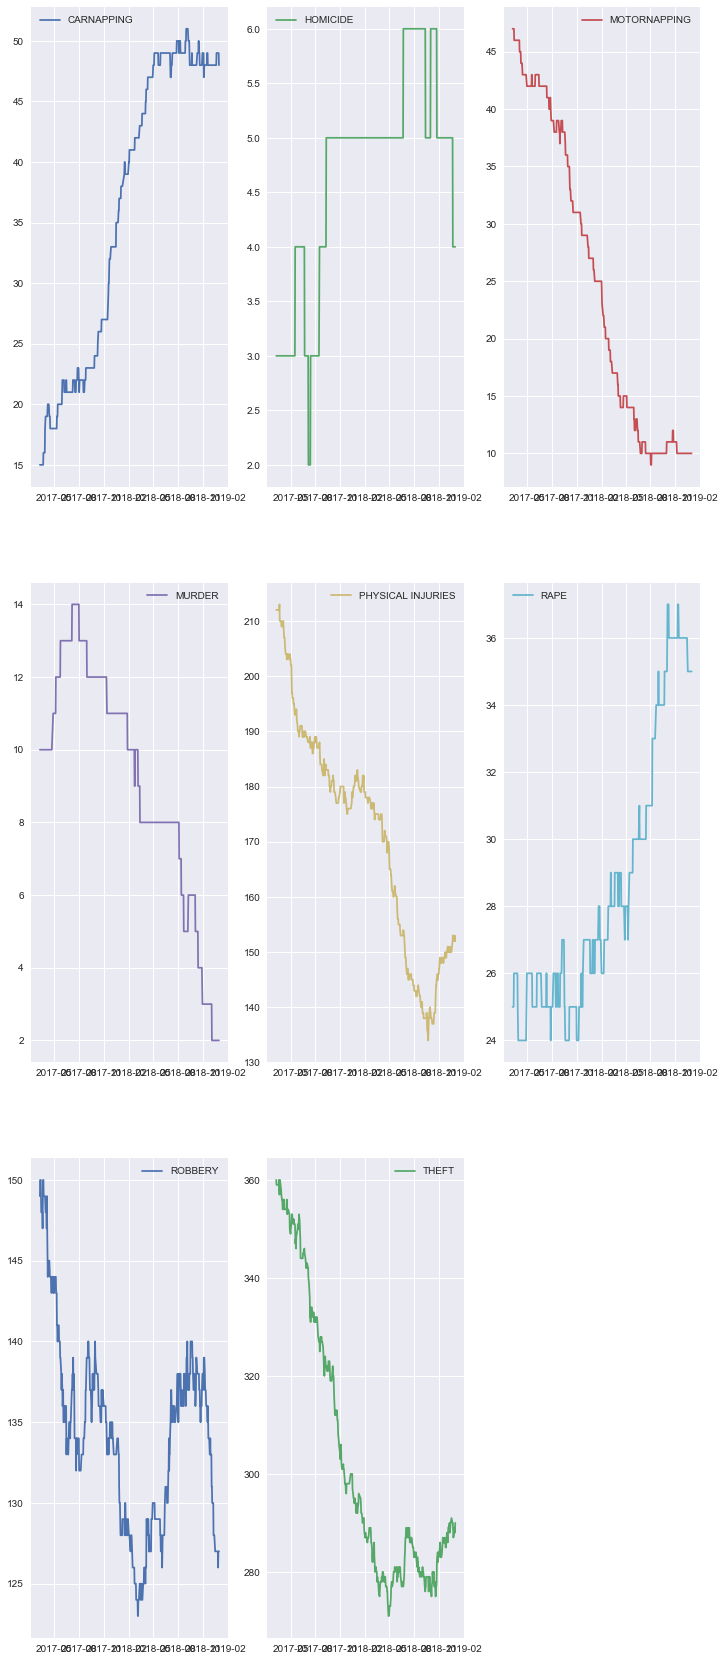

In [49]:
crimes_count_month = crimes.pivot_table('IDCrime', aggfunc=np.size, columns='offense', index=crimes.index.date, fill_value=0)
crimes_count_month.index = pd.DatetimeIndex(crimes_count_month.index)
plo = crimes_count_month.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

Carnapping and rape has been increasing since 2016, while Motornapping, Murder, Physical injuries and theft has been decreasing. Homicide and robbery seems to have a special cases

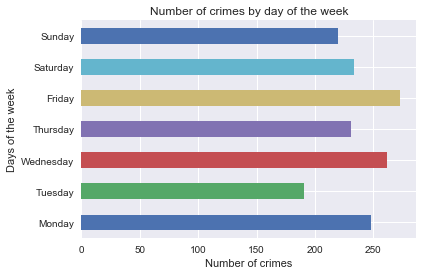

In [27]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

In [54]:
weekend = crimes['day_of_week']
crimes['is_weekend']=np.where(weekend>5, 'Yes', 'No')

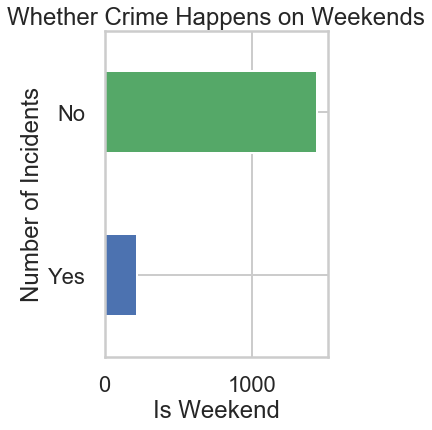

In [68]:
plt.figure(figsize=(4,6))
crimes.groupby([crimes['is_weekend']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Whether Crime Happens on Weekends')
plt.ylabel('Number of Incidents')
plt.xlabel('Is Weekend')
plt.show()

During Fridays is the highest crime incident throughtout the week while on tuesdays are the least. Most incidents even happens during weekdays, instead of weekends. Possibly that most people just stay at home during weekends and thus less likely to be victimized.

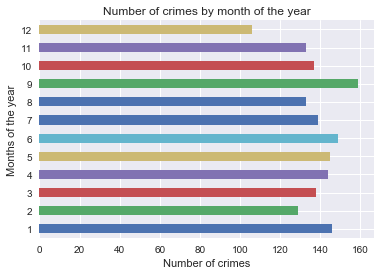

In [28]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

Most crime incidents happen during September and declines until December (which has the lowest crime incidents throughtout the year. This is counterintuitive to the idea that most crimes happen during the holidays. What happens on September in Quezon City????

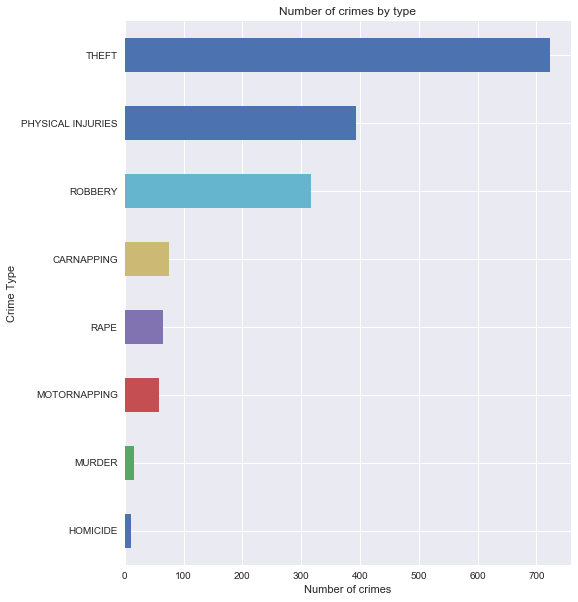

In [29]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['offense']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

The most number of type of offense from 2016 rto 2018 is Theft. While homicide is the lowest.

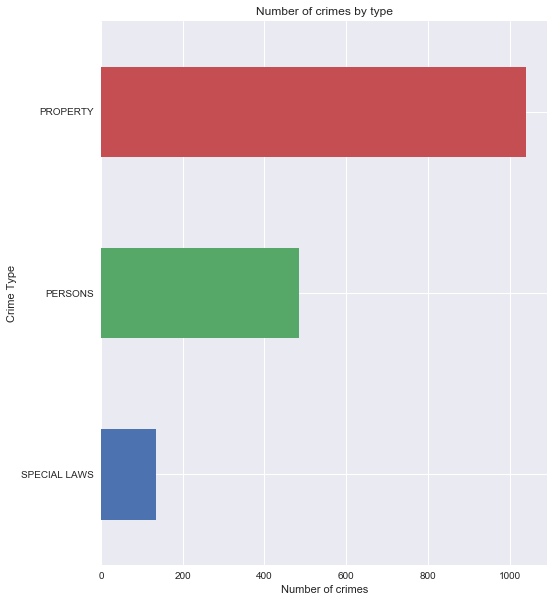

In [30]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['crime_category']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

Property is the highest which make sense because it is the combination of theft (which is the highest) and robbery. Special laws consists of the motornapping and carnapping. The offenses under Persons category consists of physical injuries(second most number of incidents throughout the years), murder, homicide and rape.

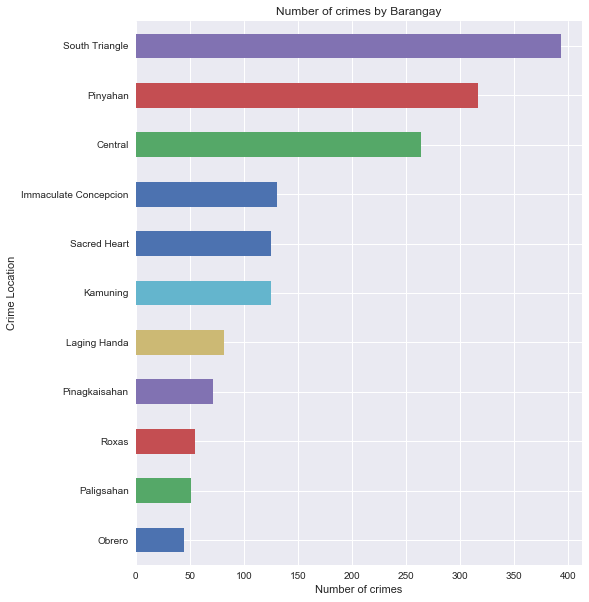

In [33]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['barangay']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Barangay')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

South triangle is the barangay with highest number of crime incidents. While Obrero has the least

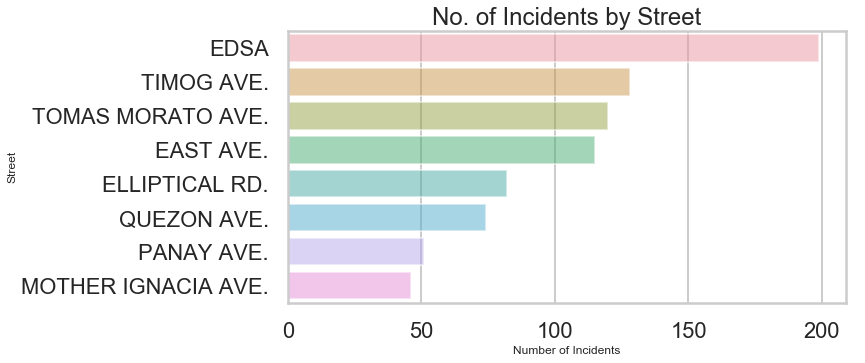

In [66]:
street  = crimes['street'].value_counts()
street = street[:8,]
plt.figure(figsize=(10,5))
ax = sns.barplot(street.values, street.index, alpha=0.5)
plt.title('No. of Incidents by Street')
plt.ylabel('Street', fontsize=12)
plt.xlabel('Number of Incidents', fontsize=12)
plt.show()

EDSA which is a main road has the highest number of crime

In [83]:
crimes_count_brgy = pd.pivot_table(crimes, aggfunc=np.size , columns = crimes.index.day, index = 'barangay')
#crimes_count_brgy.index = pd.DatetimeIndex(crimes_count_month.index)
#plo = crimes_count_brgy.plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
crimes_count_brgy

IDCrime                                                 \
date_committed             1     2     3     4     5     6     7     8    9    
barangay                                                                       
Central                  13.0  11.0   8.0   8.0   8.0   9.0   8.0   9.0  8.0   
Immaculate Concepcion     5.0   6.0   4.0   3.0   3.0   3.0   4.0   5.0  1.0   
Kamuning                  4.0   5.0   6.0   1.0   6.0   4.0   2.0   3.0  2.0   
Laging Handa              2.0   2.0   1.0   4.0   3.0   3.0   2.0   4.0  1.0   
Obrero                    4.0   NaN   1.0   5.0   NaN   1.0   4.0   2.0  2.0   
Paligsahan                1.0   NaN   1.0   2.0   NaN   1.0   1.0   2.0  NaN   
Pinagkaisahan             5.0   NaN   5.0   2.0   3.0   5.0   1.0   5.0  1.0   
Pinyahan                 11.0  15.0  14.0   9.0   9.0   8.0  14.0  11.0  5.0   
Roxas                     5.0   2.0   2.0   NaN   2.0   NaN   3.0   4.0  1.0   
Sacred Heart              8.0   5.0   4.0   5.0   NaN   2.0   8.0   4.0  4.0   
South Triangle           15.0  12.0  12.0  17.0  20.0  14.0  14.0   9.0  9.0   

                            ...   year                                      \
date_committed           10 ...     22    23    24    25    26    27    28   
barangay                    ...                                              
Central                 4.0 ...   15.0   8.0  10.0  12.0   7.0  15.0  18.0   
Immaculate Concepcion   5.0 ...    6.0   3.0   7.0   NaN   2.0   4.0   5.0   
Kamuning                5.0 ...    3.0   9.0   3.0   5.0   4.0   6.0   5.0   
Laging Handa            5.0 ...    3.0   NaN   3.0   3.0   3.0   1.0   3.0   
Obrero                  2.0 ...    1.0   NaN   1.0   1.0   NaN   2.0   NaN   
Paligsahan              2.0 ...    1.0   NaN   1.0   3.0   NaN   3.0   NaN   
Pinagkaisahan           3.0 ...    3.0   2.0   1.0   1.0   NaN   1.0   2.0   
Pinyahan               18.0 ...   13.0   6.0  16.0   8.0  12.0  12.0   7.0   
Roxas                   NaN ...    2.0   4.0   3.0   NaN   NaN   NaN   NaN   
Sacred Heart            5.0 ...    3.0   2.0   5.0   5.0   3.0   7.0   4.0   
South Triangle         10.0 ...   10.0  14.0  13.0  10.0  19.0  15.0  14.0   

                                        
date_committed           29    30   31  
barangay                                
Central                13.0   5.0  5.0  
Immaculate Concepcion   9.0   4.0  1.0  
Kamuning                3.0   1.0  5.0  
Laging Handa            4.0   2.0  3.0  
Obrero                  3.0   1.0  1.0  
Paligsahan              2.0   2.0  2.0  
Pinagkaisahan           5.0   2.0  1.0  
Pinyahan               10.0   9.0  6.0  
Roxas                   1.0   2.0  1.0  
Sacred Heart            4.0   5.0  5.0  
South Triangle          8.0  14.0  5.0  

[11 rows x 496 columns]

In [ ]:
population

In [38]:
hour_by_location = crimes.pivot_table(values='IDCrime', index='barangay', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = crimes.pivot_table(values='IDCrime', index='offense', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_week     = crimes.pivot_table(values='IDCrime', index= crimes.index.hour, columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
hour_by_week     = hour_by_week[days].T # just reorder columns according to the the order of days
dayofweek_by_location = crimes.pivot_table(values='IDCrime', index='barangay', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = crimes.pivot_table(values='IDCrime', index='offense', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = crimes.pivot_table(values='IDCrime', index='barangay', columns='offense', aggfunc=np.size).fillna(0)

In [39]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [40]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<Figure size 1080x864 with 0 Axes>

In [41]:
plt.figure(figsize=(15,7))
scale_and_plot(hour_by_location)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<Figure size 1080x504 with 0 Axes>